<a href="https://colab.research.google.com/github/DommiiUdomp/Dommii/blob/main/IntroMLPlotClassCompare_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [45]:
#Create Data
from sklearn.datasets import make_regression, make_classification, make_moons, make_circles
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1)
#Split Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(A, b_bi, test_size=0.3, random_state=101) # TRAIN TEST SPLIT

In [46]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable]

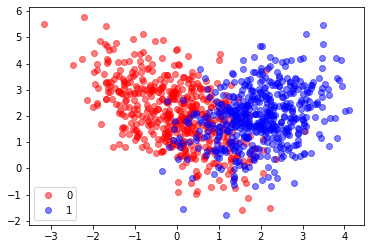

In [49]:
#Plot
figsize = (8, 4)
fig = plt.plot(figsize=figsize)
plt.plot(X[y==0, 0], X[y==0, 1], 'ro', alpha=0.5, label=0)
plt.plot(X[y==1, 0], X[y==1, 1], 'bo', alpha=0.5, label=1)
plt.legend()

In [50]:
#Plot Classification Comparison
from matplotlib.colors import ListedColormap

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [51]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural NetMLP",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

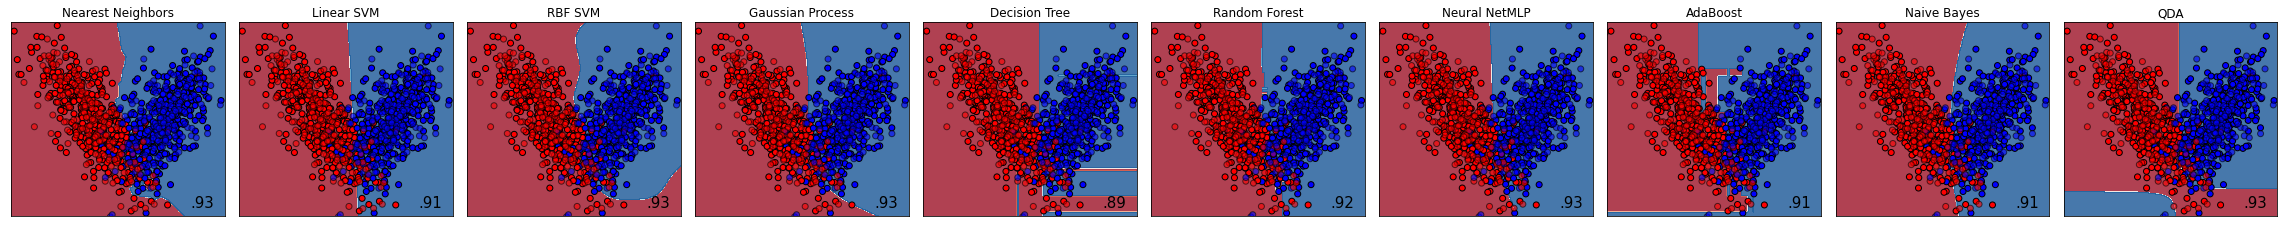

In [13]:
figure = plt.figure(figsize=(35, 9))
i = 1

amin, bmin = X_train.min(axis=0) - 0.1
amax, bmax = X_train.max(axis=0) + 0.1
hticks = np.linspace(amin, amax, 300)
vticks = np.linspace(bmin, bmax, 300)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

for name, clf in zip(names, classifiers):
  ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
  model = clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)

  c = model.predict(ab)
  cc = c.reshape(aa.shape)
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])

  ax.contourf(aa, bb, cc, cmap=cm, alpha=0.8)

# Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
  ax.set_xlim(amin, amax)
  ax.set_ylim(bmin, bmax)

# Plot the testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k" )
  ax.set_xticks(())
  ax.set_yticks(())
  
  ax.set_title(f'{name}')
  ax.text(aa.max() - 0.3, bb.min() + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right",)

  i += 1

plt.tight_layout()
plt.show()